<a href="https://colab.research.google.com/github/VikasSharma707/LGMVIP-Data-Science/blob/main/MLFacialrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LGM-VIP Data Science Internship Programme**

## **Advanced Level Task**

## **Name: ML Facial recognition to detect mood and suggest songs accordingly**

In [1]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
#Downloading datasets from kaggle
!kaggle datasets download -d msambare/fer2013

 86% 52.0M/60.3M [00:01<00:00, 34.2MB/s]
100% 60.3M/60.3M [00:01<00:00, 48.0MB/s]


In [3]:
#unzip the file
! unzip fer2013.zip -d fer2013

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

## Loading Data in train,test directories

In [4]:
train_dir = '/content/fer2013/train'
test_dir = '/content/fer2013/test'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [11]:

#MODEL
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.MaxPool2D(2,2),
        #first layer
        tf.keras.layers.Conv2D(64,(3,3),activation='relu' ),
        tf.keras.layers.MaxPool2D(2,2),
        #2nd layer
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #3rd layers
        tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #drop layer
        tf.keras.layers.Dropout(0.2),
        #flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), 
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])



model.compile(optimizer=RMSprop(learning_rate=(1e-5)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)       

In [12]:
train_datagen = ImageDataGenerator(
                              rescale=1. / 255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2,
                              fill_mode='nearest'
                              )

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [13]:
#The data consists of 48x48 pixel grayscale images of faces
img_size = 48

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 22,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 22,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [14]:

history = model.fit(train_generator,
                      steps_per_epoch=22968 / 22,
                      epochs=20,
                      verbose=1,
                      validation_data=validation_generator,
                      validation_steps= 1432 / 22)

Epoch 1/20
1044/1044 [==============================] - 31s 29ms/step - loss: 1.8332 - accuracy: 0.2509 - val_loss: 1.8182 - val_accuracy: 0.2472
Epoch 2/20
1044/1044 [==============================] - 30s 29ms/step - loss: 1.8151 - accuracy: 0.2513 - val_loss: 1.8133 - val_accuracy: 0.2472
Epoch 3/20
1044/1044 [==============================] - 30s 29ms/step - loss: 1.8106 - accuracy: 0.2521 - val_loss: 1.8101 - val_accuracy: 0.2472
Epoch 4/20
1044/1044 [==============================] - 30s 28ms/step - loss: 1.8064 - accuracy: 0.2518 - val_loss: 1.8015 - val_accuracy: 0.2514
Epoch 5/20
1044/1044 [==============================] - 29s 28ms/step - loss: 1.8003 - accuracy: 0.2546 - val_loss: 1.7961 - val_accuracy: 0.2507
Epoch 6/20
1044/1044 [==============================] - 29s 28ms/step - loss: 1.7959 - accuracy: 0.2562 - val_loss: 1.7926 - val_accuracy: 0.2521
Epoch 7/20
1044/1044 [==============================] - 29s 28ms/step - loss: 1.7923 - accuracy: 0.2577 - val_loss: 1.7883 -

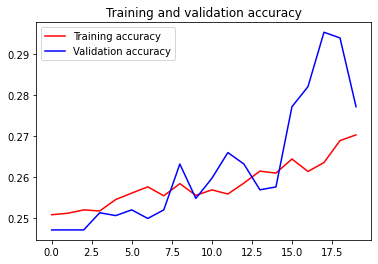

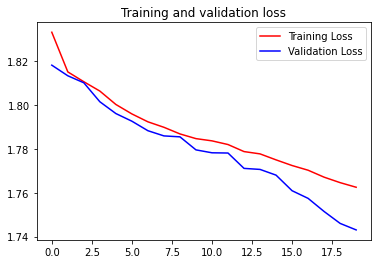

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model.save('model_fer2013.h5')

In [17]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

66/66 [==============================] - 1s 12ms/step - loss: 1.7430 - accuracy: 0.2772
final train accuracy = 26.68 , validation accuracy = 27.72


(48, 48)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Surprise


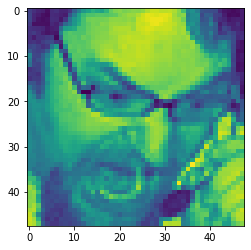

In [20]:
import numpy as np
from keras.preprocessing import image

img = image.load_img("/content/fer2013/test/angry/PrivateTest_10131363.jpg",
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

print(img.shape)

label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img, batch_size=10)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()


In [21]:
model.save_weights('model_weights.h5')